# 개요

"자연어처리"는, "컴퓨터가 인간의 언어를 알아들을 수 있게 만드는 학문"입니다.

과연 컴퓨터가 인간의 언어를 알아들을 수 있을까요? 2022년 현재 구글과 페이스북, 그리고 각종 대학교와 연구논문의 결과를 보고 있노라면 꿈만 같던 일이 이뤄지고 있는 것 같습니다. 특히 구글이 최근 개발하고 있는 언어모델 AI인 LaMDA(Language Model for Dialog Application) 이슈를 보면 AI가 지각을 가진 것 같은(?) 느낌이 들 정도로 발전했고요.

https://www.mk.co.kr/news/world/view/2022/06/516140/

하지만 모든 최첨단 기술에는 시작이 있는 법. 컴퓨팅 기술과 데이터 가용성이 향상되면서 점차 발전하고 있는 자연어 처리 방식을 1980년대로 거슬러 올라가 순서대로 한 꼬집씩 짚어보고, 비교적 최근 개발된 모델(알고리즘)인 트랜스포머, 어텐션 알고리즘, GPT와 ELMO, BERT 등에 대해서도 가볍게 한 번 알아보겠습니다.


# 1. 기초 - 파이썬으로 텍스트를 다루는 기본 문법

In [28]:
문장 = "동해물과 백두산이 마르고 닳도록 하느님이 보우하사 우리나라 만세"

In [29]:
# "하느님"이 문장 변수 안에 있는지 확인 : True를 리턴
"하느님" in 문장

True

In [30]:
# 문장 내 "백두산"이 출현하는 인덱스 : 5
문장.index("백두산")  # 파이썬 인덱스는 0부터 올라감

5

In [31]:
# "우리나라"는 문장 변수에서 몇 번째 단어인가? : 6번째(인덱스는 0부터)
문장.split().index("우리나라")

6

In [32]:
# 문장 변수의 세 번째 단어(마르고)를 리턴하려면?
문장.split()[2]  # 0:동해물과, 1:백두산이, 2:마르고

'마르고'

In [33]:
# 문장 변수의 글자 순서를 역순 정렬하여 리턴하려면?
문장[::-1]  # [시작인덱스(생략함) : 끝인덱스(생략함) : 간격(뒤로1칸씩)]

'세만 라나리우 사하우보 이님느하 록도닳 고르마 이산두백 과물해동'

In [34]:
# 문장 변수의 첫 번째 단어와 마지막 단어를 연결하려면?  # "동해물과만세"
단어리스트 = 문장.split()
첫번째단어 = 단어리스트[0]
마지막단어 = 단어리스트[-1]
시작과끝단어 = 첫번째단어 + 마지막단어

print(시작과끝단어)

동해물과만세


In [35]:
# 짝수 인덱스(0, 2, 4, ..)의 단어만 출력하려면?  # 동해물과 마르고 하느님이 우리나라
[단어리스트[i] for i in range(len(단어리스트)) if i % 2 == 0]

['동해물과', '마르고', '하느님이', '우리나라']

In [36]:
# 문장 변수의 마지막 다섯 글자만 출력하려면?  # "나라 만세"
문장[-5:]

'나라 만세'

In [37]:
# 단어 순서는 유지하면서 글자 순서만 역순으로 출력하려면?
" ".join(단어[::-1] for 단어 in 단어리스트)

'과물해동 이산두백 고르마 록도닳 이님느하 사하우보 라나리우 세만'

In [38]:
# 대소문자를 전부 소문자로 바꾸려면?
"Hello World!".lower()  # 대문자는 .upper()

'hello world!'

# 자연어 처리의 시작 : 토큰화

위의 문법이면 웹에서 수집한 텍스트나 DB, 스토리지에서 가져온 텍스트자료를 가지고 기본적인 전처리를 수행하는 데 충분할 것입니다. 이제 "토큰화"부터 본격적인 NLP 단계의 전처리를 시작해봅시다.

토큰화Tokenization는 문장을 구성 단어로 나누는 절차를 말합니다.

### "나는 책을 읽고 있다."

위 문장에서 가장 먼저 처리할 작업은 이 문장의 단어(토큰)를 추출하는 것입니다. 가장 기본적인 방법은 한 단어씩 구분짓는 것입니다. 부호도 포함해서요.

### ["나는", "책을", "읽고", "있다", "."]

이렇게 한 번에 한 단어씩 토큰을 추출했습니다. 이런 경우를 유니그램Unigram이라고 부릅니다. (Uni는 1을 뜻함)

경우에 따라 두 개나 세 개의 토큰을 추출할 수도 있습니다.

### ["나는 책을", "책을 읽고", "읽고 있다", "있다."]

이렇게 두 개씩 묶어 만들면 바이그램Bi-Gram, 세 개씩 묶으면 트라이그램Tri-Gram이라고 부릅니다. 자주는 아니지만 경우에 따라 4개 이상의 단어로 토큰을 추출할 경우 n-그램이라고 부릅니다. (여기서 n은 자연수)

지금까지 설명드린 것이 "단어레벨(Word Level)"의 엔그램이고, 필요에 따라 글자단위Character level) 엔그램으로 토큰을 생성하기도 합니다. 아래처럼요. (캐릭터레벨 토큰화는 대부분 스페이스를 한 개의 글자로 간주합니다.)

### ["나는 ", "는 책", " 책을", "책을 ", "을 읽", " 읽고", "읽고 ", "고 있", " 있다", "있다."]

## n-gram의 활용

왜 엔그램을 알아야 할까요? 자연어처리에서 엔그램은 의외로 많은 곳에 사용됩니다. 자연어처리를 활용하는 몇 가지 애플리케이션이 있는데, 예를 들면 인풋박스에 뭔가 타이핑을 할 때 다음 단어가 무엇이 오는지 예측을 할 수 있겠죠? 오타 같은 것을 발견해서 다른 단어를 추천해줄 수도 있을 겁니다. (현재는 대부분 머신러닝 기반 추천 알고리즘을 사용하고 있습니다.)

## n-gram의 장점

엔그램과 대조되는 또 다른 토큰화 기법으로 Bag-of-Words가 있습니다. 말 그대로 "단어가방"인데요. 바로 다음 순서에 소개드리겠지만, BoW는 단어의 순서가 철저하게 무시됩니다. 엔그램을 쓰면 이 문제를 극복하고 어느 정도 문맥을 유지할 수 있거든요. 여기서 잠깐 BoW의 개념에 대해서도 한 번 짚고 돌아오겠습니다.

## BoW - Bag of Words

아래와 같은 문장이 있다고 생각해보겠습니다.

### "machine learning is fun and is not boring"

이걸 BoW로 만들면 아래처럼 바뀝니다.

![](https://i.ibb.co/5hfBRxq/256.png)

첫 번째 문제는 머신러닝이라는 문맥적인 것을 알고 싶은데 BoW는 머신이 한 개고 러닝이 한 개라고만 알려줍니다.

두 번째 문제는 바로 not의 위치입니다. 주어진 문장은, "머신러닝은 fun하고 boring하지 않다"는 뜻인데, BoW로 넘어가면 is fun and is not boring이나, is not fun and is boring이나 동일한 BoW가 되어버립니다.

이 문장을 단어레벨 바이그램으로 토큰화하면 어떻게 될까요?

### ["machine learning", "learning is", "is fun", "fun and", "and is", "is not", "not boring"]

차이가 보이시나요? 머신러닝이라는 단어가 한 개의 토큰이 되었고, not boring이 하나의 토큰이 되어서 not이 boring과 붙어있다는 걸 컴퓨터가 인식할 수 있겠죠? (어떻게 인식하는지는 조금 뒤에서 다루겠습니다.)

이렇게 엔그램을 활용한 bag of bigram으로 토큰을 만들었을 때 인식률이나 퍼포먼스가 올라갈 것으로 예상할 수 있습니다. 문맥적인 부분을 숫자로 표현할 수 있게 되었으니까요.

엔그램이 활용되는 또 다른 예제는 바로 Next word prediction(다음 단어 예측)입니다. 현재는 굉장히 발전된 단어예측 알고리즘들이 있지만, 예전에는 이런 방식으로도 다소나마 구현이 가능했습니다.

how are you doing, how are you, how are they라는 데이터가 입력되어 있을 때, 트라이그램으로 토큰화를 했다면 대략

### how are you
### are you doing
### how are you
### how are they

이런 네 개의 토큰이 만들어졌을 겁니다. 이를 기반으로 사용자가 검색창에 "how are"를 입력했다면? 이 알고리즘은 카운트 기반으로 "you"를 추천해줄 수 있습니다.

![](https://i.ibb.co/93qpH2C/257.png)

마지막으로 엔그램을 활용하는 또 다른 예로, 스펠체크를 할 수 있을 겁니다.

### quality
### quarter
### quit

이렇게 스펠체커의 knowledge base data에 세 개의 단어로 바이그램이 입력된 상태에서 "qwal"을 입력하면?

![](https://i.ibb.co/4K44sQB/258.png)

qual이라고 추천해줄 수 있겠죠?

이제 토큰화를 파이썬 코드로 간단히 구현해보겠습니다.

In [39]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download("punkt")

words = word_tokenize("We are studying NLP Fundamentals")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smj02\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smj02\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
words

['We', 'are', 'studying', 'NLP', 'Fundamentals']

In [41]:
def generate_N_grams(text, ngram=1):
    "nltk의 불용어 사전 활용한 n그램 함수"
    words = [word for word in text.split(" ") if word not in set(stopwords.words('english'))]
    temp = zip(*[words[i:] for i in range(0, ngram)])
    ans = [' '.join(ngram) for ngram in temp]
    return ans

In [42]:
unigram = generate_N_grams("We are studying NLP Fundamentals")
unigram

['We', 'studying', 'NLP', 'Fundamentals']

In [43]:
bigram = generate_N_grams("We are studying NLP Fundamentals", 2)
bigram

['We studying', 'studying NLP', 'NLP Fundamentals']

# TF-IDF

엔그램이나 BoW를 이용한 NGD 알고리즘은 복잡한 자연어처리에 한계가 있었습니다. 품사를 직접 태깅해야 했고, 불용어를 제거해야 하며, 텍스트 정규화, 철자수정, 어간추출이나 단어의 중의성 문제 등.. 수많은 문제를 해결해야 했습니다. 특히 표제어를 추출하거나문서간 유사도를 측정하는 등의 간단한 연산도 "단어가 몇 번 들어가는가?" 정도의 숫자세기에서 그치게 되었습니다.

이런 문제에 대한 진일보한 해결책들이 하나씩 개발되었는데, TF-IDF도 그 중 하나입니다. TF-IDF는 Term Frequency - Invese Document Frequency의 약자입니다. Term이란 문장이 주어졌을 때 단어를 뜻한다고 보시면 됩니다. 이걸 왜 사용하게 되었을까요? 문서, 즉 문장들은 단어로 구성되어 있는데, 이 단어들을 통해 문서의 연관성을 알고 싶을 때 TF-IDF 알고리즘을 사용합니다. 문장을 구성하는 단어별로 문서에 대한 "정보"를 얼마나 많이 가지고 있을까 하는 것을 "숫자"로 표현할 수 있는 알고리즘입니다.

먼저 알아볼 것은 TF입니다. 문서가 주어졌을 때 단어가 몇 번씩 주어졌는지. 문서 안에 단어가 여러 번 출현했다면 연관성이 높을 것이라는 가정하에 빈도에 의한 점수를 매깁니다.

![](https://i.ibb.co/pZNJkcK/259.png)

car가 가장 빈도가 높고 가장 중요한 단어로 간주해도 될 것입니다. 그런데 TF스코어만 사용하면 치명적인 단점이 있습니다. 바로 "흔한 단어" 때문인데요.

![](https://i.ibb.co/BTtQQjj/260.png)

a와 friend가 공동1등입니다. 문서와 연관성은 깊지 않지만 관사나 대명사 외에도 여러 문서에 자주 출현하는 흔한 단어가 있을 것입니다. 이러한 단어들에 패널티를 주기 위해 IDF라는 개념을 사용하는데요. 공식은 간단합니다.

### Log(Total # of Docs / # of Docs with the term in it)

 로그 안에서 총 문장의 갯수를 단어가 출현한 문장의 갯수로 나눠준 값입니다. 수학적 오류를 피하기 위해 분모에 1을 더해주기도 합니다.

![](https://i.ibb.co/g3RBcZ0/263.png)

TF와 IDF를 곱하면 아래와 같은 결과가 나옵니다.

![](https://i.ibb.co/7K2HBZb/263.png)

문장A에서 TF-IDF값이 가장 높은 단어는 0.13의 car이고,
문장B에서는 0.08로 friend라는 것을 볼 수 있습니다.

문장B에서 가장 핵심이 되는 단어, 문장과 가장 연관성이 높은 단어가 각각 car와 friend라는 의미이기도 합니다.

요약하면 문서, 문장이 주어졌을 때 TF-IDF는 각 단어별로 문장과의 연관성을 수치로 나타낸 값이라고 볼 수 있습니다.

# word2vec

이제 본격적으로 단어를 벡터로 변환하는 알고리즘인 word2vec에 대해 알아보겠습니다.

딥러닝 모델에 텍스트를 넣을 수 없죠. 숫자는 넣을 수 있습니다. 자연어처리의 대상은 텍스트인데, 이를 숫자로 바꾸는 것을 인코딩이라고 합니다.

"thank you"와 "I love you"라는 문장이 주어졌을 때 가장 간단한 방법은 출현 순서대로 숫자를 매기는 방법일 것입니다.

 {thank : 0,
 you   : 1,
 I     : 2,
 love  : 3}

이런 식으로 단순하게요.
하지만 딥러닝에서 많이 쓰이는 방법은 원-핫 인코딩입니다. 독립적인 벡터를 만들어주는 방법이죠.

{thank : [1, 0, 0, 0],
 you   : [0, 1, 0, 0],
 I     : [0, 0, 1, 0],
 love  : [0, 0, 0, 1]}

그런데 이런 방식의 단점은 단어간의 유사도를 알 수 없다는 것입니다. "고맙다"와 "사랑한다"는 "고맙다"와 "미워한다"보다 좀 더 가까워야할텐데, 원핫인코딩으로는 그 정보를 표현할 수가 없습니다. 모든 단어 벡터간의 거리가 같아요. 유클리드거리도 전부 동일하고, 코사인유사도를 구하려고 해도 전부 직교하는 벡터니까요.

이러한 문제 때문에 "임베딩embedding"이라는 개념이 도입되었습니다.

인코딩 대신에 임베딩을 사용함으로써 단어벡터끼리의 유사도를 구할 수가 있게 됩니다. 임베딩은 원핫인코딩보다 오히려 차원도 적으면서 유사도를 갖게 됩니다. (학습방법은 아래에서 설명하겠습니다.)

![](https://i.ibb.co/9szggXh/264.png)

비슷한 단어는 서로 가까이 분포하는 것을 보실 수 있습니다.

word2vec은 여러가지 임베딩 기법 중 하나이고요. 이 유사도 같은 경우에는 비슷한 위치에 있는 단어들을 통해 유사도 값을 얻게 됩니다. 참고로 비슷한 위치에 있는 단어들을 "이웃"이라고 합니다.

word2vec 데이터를 생성하는 가장 단순한 방법은 바로 이웃 단어를 활용한 skipgram을 통해 학습하는 것입니다. skipgram을 간단히 설명드리겠습니다. 여기부터는 반갑게도 우리에게 익숙한 "머신러닝"과 "학습"개념이 나옵니다.

### 스킵그램 : word2vec 데이터 생성

스킵그램은 word2vec 데이터를 생성하는 알고리즘입니다. 몇 개의 이웃을 선택하느냐 하는 개념을 "window size"라고 부릅니다. 윈도우사이즈가 1이면 왼쪽과 오른쪽으로 하나씩의 이웃만 보겠다는 겁니다.

예제를 통해 설명드리겠습니다.

### "king brave man"

### "queen beautiful woman"

이 두 문장을 가지고 스킵그램을 작성해보겠습니다.

![](https://i.ibb.co/mFGkYFC/266.png)

king의 이웃은 brave,
brave의 이웃은 king과 man이겠죠?
이런 식으로 위의 표를 만듭니다.

딥러닝 모델의 인풋이 word 열이고,
타겟이 neighbor가 됩니다.

경사하강법으로 컴퓨터가 직접 데이터를 만듭니다.

윈도우사이즈가 2라면 어떻게 될까요?

![](https://i.ibb.co/xDwvCXj/267.png)

딥러닝 모델에 들어갈 데이터는 "텍스트"가 아니라 인코딩한 값인 "벡터"가 들어가게 됩니다. 아래처럼요.

![](https://i.ibb.co/xH2g9hm/268.png)

이렇게 인풋과 타겟을 주고 중간에 은닉층의 가중치 값을 얻게 되는 겁니다.

딥러닝 모델은 대략 아래와 같이 생겼습니다. (예시임)

<img src="https://i.ibb.co/gyP9R94/269.png" width="1000"/>

원핫인코딩한 벡터가 그대로 6개의 인풋레이어가 되고, 히든레이어의 두 개의 가중치는 "2차원의 벡터"를 만들겠다는 의미입니다.

w1은 (스칼라값이 아니라) [w11, w12, w13, w14, w15, w16]로, 6차원 형태의 벡터이고,

w2도 동일하게 [w21, w22, w23, w24, w25, w26] 입니다.

king은 원핫인코딩 변환시 [1, 0, 0, 0, 0, 0] 이었습니다.

초기화된 w1, w2를 지나서 출력레이어(소프트맥스를 적용한) 값이 [0.1, 0.9, 0, 0, 0, 0] 이 나왔는데

그런데 타겟 값은 [0, 1, 0, 0, 0, 0] 으로 작은 오차가 발생했습니다.

이 오차값을 가지고 크로스엔트로피 오차함수loss function를 돌려서 되돌아가 w1과 w2를 옵티마이징합니다.

(지난 딥러닝 기초 시간에 이런 방식의 오차보정 과정을 "역전파 알고리즘"이라고 불렀습니다.)

이를 반복해서 최적의 w1과 w2를 구합니다.

### word2vec은 어디 있나요?

다소 복잡한 과정을 통해서 가중치 w1과 w2가 최적화되었습니다. 그런데 말입니다. 모델학습은 완료되었는데, 애초에 우리가 구하고자 했던 건 바로 word2vec이었죠?

이제 word2vec은 어떻게 구할까요?

### 학습된 가중치가 바로 word2vec입니다.

재미있게도 우리는 이미 word2vec을 얻었습니다.

학습된 가중치 w1, w2가 바로 인풋벡터(단어)들의 word2vec, 즉 임베딩 값입니다.

<img src="https://i.ibb.co/2tPyH3J/271.png" width="1000"/>



단어 각각의 원핫인코딩 벡터와 은닉층의 가중치를 곱하면 w1, w2의 다른 가중치들은 모두 0이 되고 단어에 해당하는 2차원 벡터만 남게 됩니다.

이렇게 히든 레이어 값들을 2차원 좌표에 표시해보면,

<img src="https://i.ibb.co/XW6WjC7/272.png" width="1000"/>

man과 king이 비슷한 위치에 있고, woman과 queen이 비슷한 위치에 있네요. 보시는 바와 같이 인코딩은 6차원 벡터였지만 임베딩은 2차원 벡터가 되었고, 유사도를 구현해낸 것을 보실 수가 있습니다.

pip로 word2vec 모듈을 설치하실 수도 있지만, 여러분의 PC에, 혹은 구글 콜랩에서 텐서플로를 통해서도 word2vec을 구현해보실 수 있습니다.

# word2vec 실습(tensorflow)

아래 예제코드는 "나의 첫 머신러닝/딥러닝"의 저자이자,
딥러닝 분야 전문(?) 유튜버이신 허민석 님의 깃헙 튜토리얼을 참고했습니다.
위 책도 유명하지만, 이 분의 유튜브 채널은 정말 '무료로 이렇게까지 알려주나?' 싶을 만큼
쉽게 설명을 잘 해주시는 걸로 정평이 나 있습니다. 꼭 한 번 들어가보시기를 추천드립니다.

<a href="https://www.youtube.com/user/TheEasyoung">허민석 님의 유튜브 채널</a>

In [64]:
# 10개 예시문장 입력

corpus = ['king is a strong man',
          'queen is a wise woman',
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong',
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [65]:
# 불용어
stop_words = ['is', 'a', 'will', 'be']


# 불용어 제거함수 정의
def remove_stop_words(corpus, stop_words):
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))

    return results


# 불용어 배제
corpus = remove_stop_words(corpus, stop_words)
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [66]:
# corpus에서 단어 추출

words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)  # set 자료형은 "집합"개념과 유사하며, 중복값이 제거되지만, 순서가 섞임

words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [67]:
word2int = {}  # 사전 자료형 - {키:값..} 형태

for i, word in enumerate(words):
    word2int[word] = i  # 단어를 키로, 인덱스를 값으로

word2int

{'boy': 0,
 'man': 1,
 'prince': 2,
 'strong': 3,
 'young': 4,
 'girl': 5,
 'wise': 6,
 'princess': 7,
 'pretty': 8,
 'queen': 9,
 'woman': 10,
 'king': 11}

In [68]:
sentences = []
for sentence in corpus:  # 각 문장을 단어별로 자르기
    sentences.append(sentence.split())

sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [69]:
WINDOW_SIZE = 2  # 스킵그램 윈도우사이즈 지정

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                data.append([word, neighbor])

data  # 윈도우사이즈 2의 스킵그램 데이터 생성

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman'],
 ['woman', 'queen'],
 ['woman', 'wise'],
 ['boy', 'young'],
 ['boy', 'man'],
 ['young', 'boy'],
 ['young', 'man'],
 ['man', 'boy'],
 ['man', 'young'],
 ['girl', 'young'],
 ['girl', 'woman'],
 ['young', 'girl'],
 ['young', 'woman'],
 ['woman', 'girl'],
 ['woman', 'young'],
 ['prince', 'young'],
 ['prince', 'king'],
 ['young', 'prince'],
 ['young', 'king'],
 ['king', 'prince'],
 ['king', 'young'],
 ['princess', 'young'],
 ['princess', 'queen'],
 ['young', 'princess'],
 ['young', 'queen'],
 ['queen', 'princess'],
 ['queen', 'young'],
 ['man', 'strong'],
 ['strong', 'man'],
 ['woman', 'pretty'],
 ['pretty', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'prince'],
 ['boy', 'king'],
 ['king', 'prince'],
 ['king', 'boy'],
 ['princess', 'girl'],
 ['princess', 'queen'],
 ['girl', 'prin

In [70]:
import pandas as pd

df = pd.DataFrame(data, columns=['input', 'label'])

df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [71]:
df.shape

(52, 2)

In [72]:
import tensorflow.compat.v1 as tf  # 텐서플로 v1의 코드를 2.0 이상에서 실행해주는 모듈
import numpy as np

tf.disable_v2_behavior()  # 텐서플로 v2 기능 비활성화

ONE_HOT_DIM = len(words)  # 원핫인코딩 벡터의 길이(차원 수) 결정(12개 단어이므로 12차원)


# 원핫인코딩벡터 생성함수 정의
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)  # 전부 0으로 채워놓고
    one_hot_encoding[data_point_index] = 1  # 해당하는 인덱스에만 1 입력
    return one_hot_encoding

In [73]:
X = []  # 입력단어 리스트
Y = []  # 타겟단어 리스트

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[x]))
    Y.append(to_one_hot_encoding(word2int[y]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

X

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1.

In [75]:
# making placeholders for X_train and Y_train  # tf.v1 전용 메서드로 v2에서 제거됨ㅜ
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# 워드임베딩은 2차원 적용(시각화를 위해)
EMBEDDING_DIM = 2

# 은닉층 가중치와 편향 정의(가중치는 최종적으로 워드벡터가 될 예정)
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))  # 12, 2
b1 = tf.Variable(tf.random_normal([1]))
hidden_layer = tf.add(tf.matmul(x, W1), b1)

In [76]:
# 출력층 정의
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))  # 2, 12
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

In [77]:
# 훈련 정의(학습률learning rate = 0.05)
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [78]:
# 세션 정의 및 학습 시작
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 20000
for i in range(iteration):
    # 입력값인 X_train은 현재 원핫인코딩된 각각의 단어 벡터
    # 레이블(타겟값)은 원핫인코딩된 이웃단어 벡터
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:  # 매 3,000회마다 오차 모니터링
        print(f'iteration {str(i)} loss is : {sess.run(loss, feed_dict={x: X_train, y_label: Y_train})}')

iteration 0 loss is : 4.4689507484436035
iteration 3000 loss is : 1.7747855186462402
iteration 6000 loss is : 1.7185957431793213
iteration 9000 loss is : 1.693145990371704
iteration 12000 loss is : 1.6801139116287231
iteration 15000 loss is : 1.6716334819793701
iteration 18000 loss is : 1.6654167175292969


In [84]:
# 은닉층의 가중치 W1에 요소별로 편향값을 더한 값이 최종 워드임베딩 벡터값임
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.94628704  0.6693933 ]
 [-3.3740416   3.5456753 ]
 [-4.2270617   4.0713596 ]
 [-2.749609   -1.3697888 ]
 [-0.03993738 -0.29263544]
 [ 1.7901714   0.9794548 ]
 [ 5.314395    2.7705908 ]
 [ 4.0996294   3.22924   ]
 [ 3.6869469  -0.516242  ]
 [ 0.7564027   0.3388496 ]
 [ 0.8927691   0.9816378 ]
 [-0.8855157   0.8122522 ]]


In [87]:
# 참고

W1 = sess.run(W1)
W1

array([[-1.9025042 , -0.2868239 ],
       [-4.330259  ,  2.589458  ],
       [-5.183279  ,  3.1151426 ],
       [-3.7058263 , -2.326006  ],
       [-0.99615455, -1.2488526 ],
       [ 0.8339543 ,  0.02323763],
       [ 4.3581777 ,  1.8143736 ],
       [ 3.143412  ,  2.273023  ],
       [ 2.7307296 , -1.4724592 ],
       [-0.19981448, -0.61736757],
       [-0.06344809,  0.02542062],
       [-1.8417329 , -0.14396495]], dtype=float32)

In [88]:
# 참고

b1 = sess.run(b1)
b1

array([0.95621717], dtype=float32)

In [89]:
# 참고

W1 + b1

array([[-0.94628704,  0.6693933 ],
       [-3.3740416 ,  3.5456753 ],
       [-4.2270617 ,  4.0713596 ],
       [-2.749609  , -1.3697888 ],
       [-0.03993738, -0.29263544],
       [ 1.7901714 ,  0.9794548 ],
       [ 5.314395  ,  2.7705908 ],
       [ 4.0996294 ,  3.22924   ],
       [ 3.6869469 , -0.516242  ],
       [ 0.7564027 ,  0.3388496 ],
       [ 0.8927691 ,  0.9816378 ],
       [-0.8855157 ,  0.8122522 ]], dtype=float32)

In [90]:
# df로 변환

w2v_df = pd.DataFrame(vectors, columns=['x1', 'x2'])
w2v_df['word'] = words
w2v_df

,x1,x2,word
0,-0.946287,0.669393,boy
1,-3.374042,3.545675,man
2,-4.227062,4.071360,prince
3,-2.749609,-1.369789,strong
4,-0.039937,-0.292635,young
5,1.790171,0.979455,girl
6,5.314395,2.770591,wise
7,4.099629,3.229240,princess
8,3.686947,-0.516242,pretty
9,0.756403,0.338850,queen


In [91]:
# 칼럼순서 정렬

w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,boy,-0.946287,0.669393
1,man,-3.374042,3.545675
2,prince,-4.227062,4.071360
3,strong,-2.749609,-1.369789
4,young,-0.039937,-0.292635
5,girl,1.790171,0.979455
6,wise,5.314395,2.770591
7,princess,4.099629,3.229240
8,pretty,3.686947,-0.516242
9,queen,0.756403,0.338850


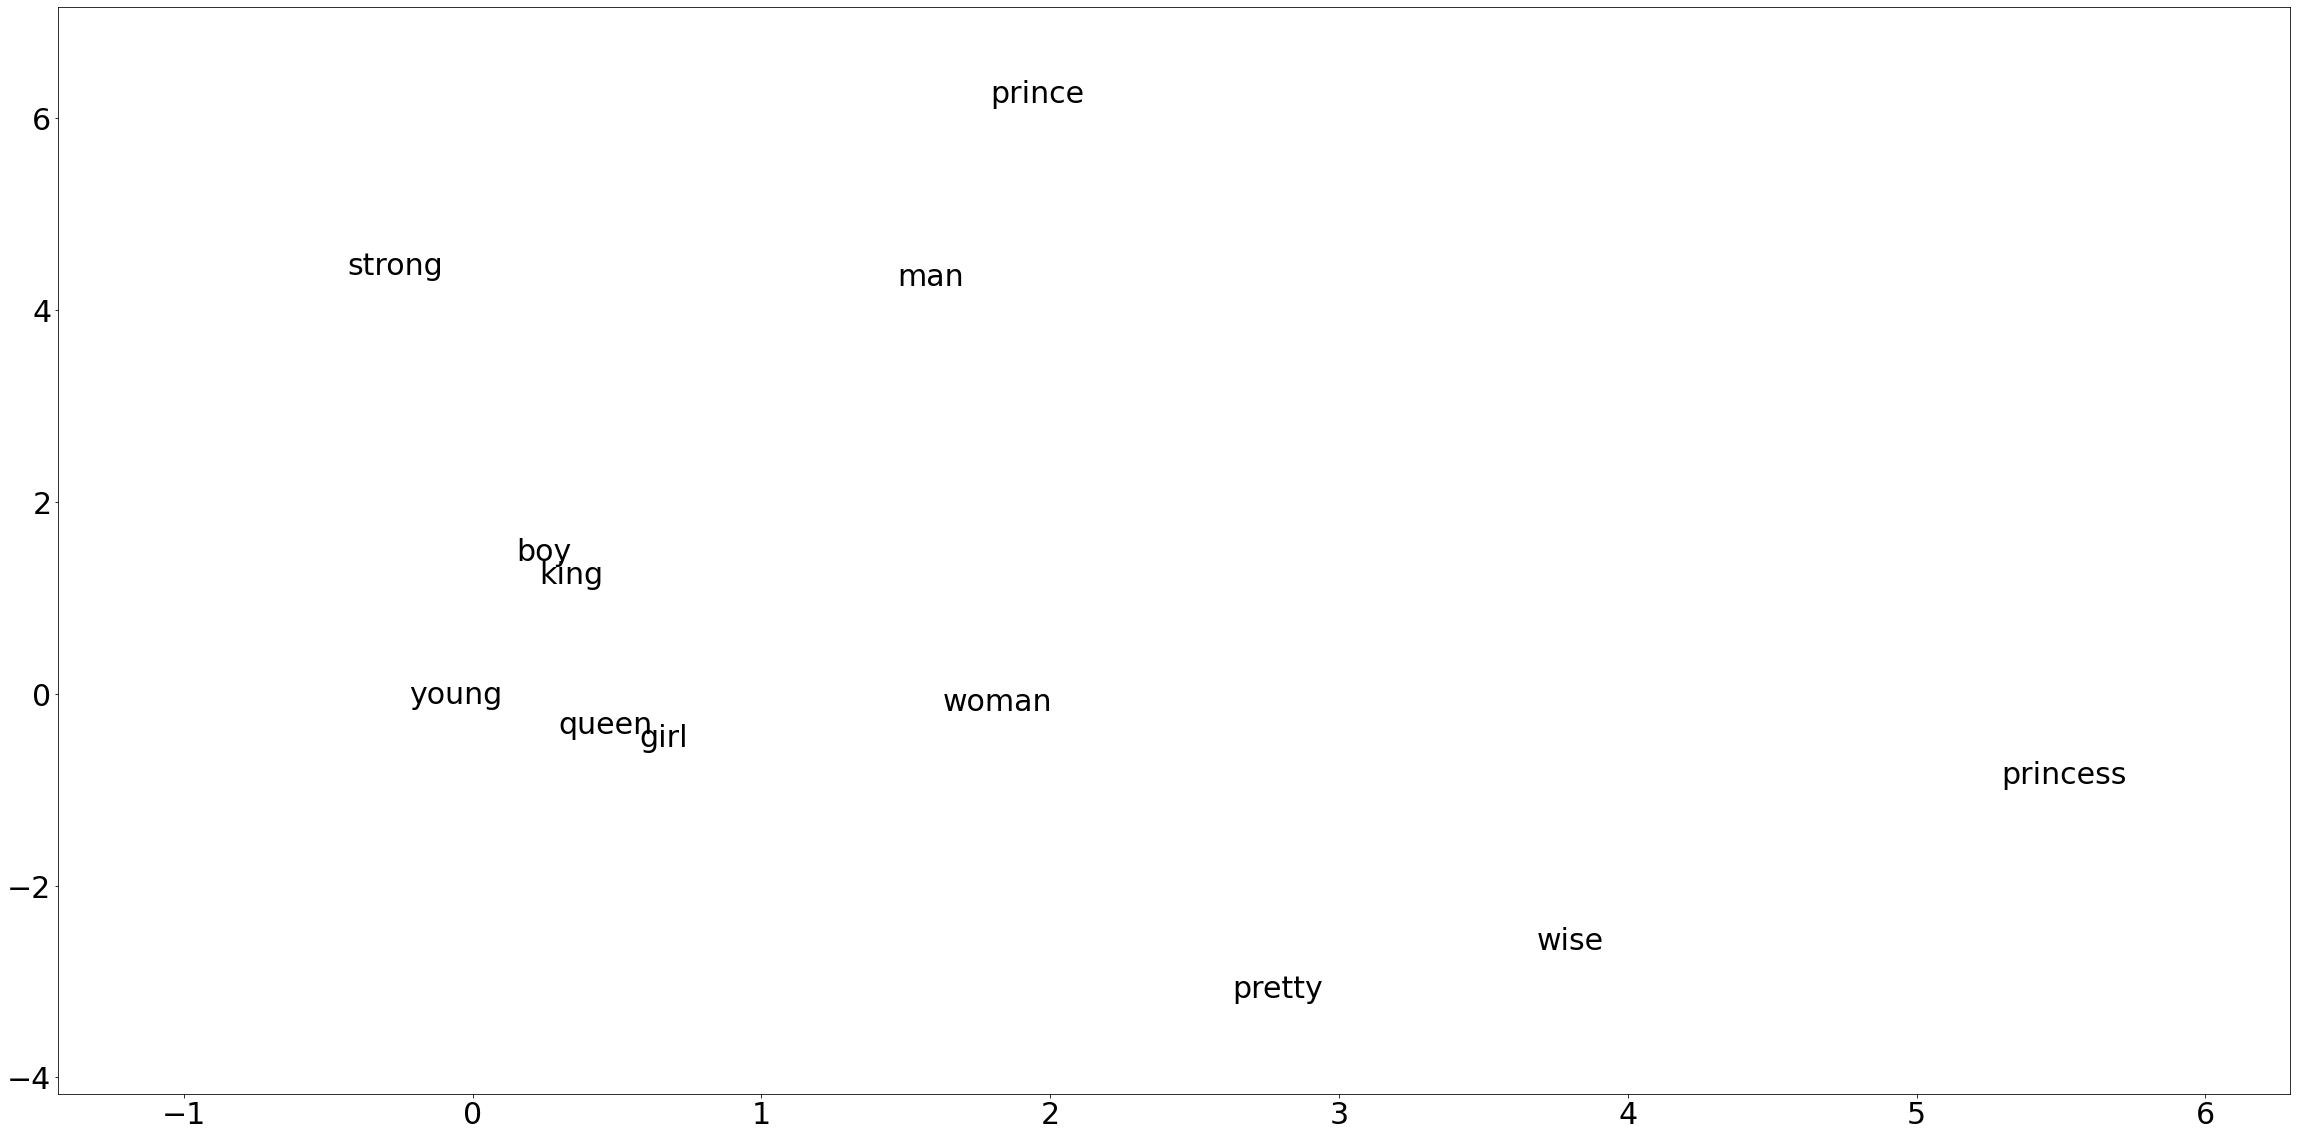

In [42]:
# 2차원 평면에 시각화

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1, x2))

PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams["figure.figsize"] = (40, 20)
plt.rcParams["font.size"] = 30

plt.show()

이것으로 word2vec의 실습을 마칩니다.

간단한 설명과 실습을 통해 단어가 어떤 과정을 통해 숫자로 바뀌는지 알아보았습니다.
컴퓨터가 어떤 방식으로 주어진 단어의 의미를 이해할 수 있는지를 막연하게나마 아시겠죠?

아래에 설명드릴 (비교적) 최신 언어모델인 GPT도 이와 유사한 방식으로 대량의 텍스트데이터를 통해 비지도 선행학습을 거친 후에
원하는 실행형태에 따라 파인튜닝을 적용하고 최종 레이어를 추가하는 단계를 거치게 됩니다.
(GPT는 이후에 보다 자세히 설명드리겠습니다.)

이제 본격적인 순차적데이터 처리모델인 RNN으로 넘어가봅시다.

# RNN 기초

RNN은 순차적인 데이터를 입력받아 결괏값을 도출하는 데 사용하는 딥러닝 모델입니다. 대표적으로 자연어 처리에 많이 사용됩니다.

아래는 RNN의 필요성을 강조하는 유명한 예제입니다.

###  I work at Google

### I google at work

두 문장의 품사를 보면 각각
I(대명사) work(동사) at(전치사) Google(명사)

두 번째 문장의 구성은
I(대명사) google(동사) at(전치사) work(명사)

입니다.

같은 입력값(단어)임에도 다른 출력값(품사)이 나온 이유는 바로
이전의 입력값들이 현재 입력값(단어)의 출력값(품사)에 영향을 주기 때문입니다.

순차적인 구성을 고려하지 않는다면 이런 정보들이 모두 소실되어버릴 것입니다.
그러면 RNN의 구조는 어떤 방식으로 이전 입력값들을 고려하고,
결과적으로 출력값을 보완하게 될까요?

바로 가중치(w, b) 외에 상태값(state)을 통해서 이전 셀(뉴런)의 정보를 제공받게 됩니다.
상태값은 대략 tanh(입력값*wx + 이전셀상태값*wh + 편향) 함수로 결정됩니다.
(tanh는 탄젠트하이퍼볼릭 함수로, 시그모이드와 유사하게 -1에서 1까지의 값을 갖습니다.)

일반적인 딥러닝 모델과 마찬가지로 w와 b는 최초 무작위로 부여하고, 학습을 통해 업데이트됩니다.

간단한 RNN 실습예제인 품사구분 예제를 통해 RNN의 원리를 알아봅시다.


# RNN 실습 : 텐서플로를 이용한 단어 품사 구분(간소화)

In [123]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN
from tensorflow.keras.models import Model
import numpy as np

# 항상 같은 결과를 갖기 위해 랜덤 시드 설정
tf.random.set_seed(1)
np.random.seed(1)

In [124]:
# I      [1,0,0,0]
# work   [0,1,0,0]
# at     [0,0,1,0]
# google [0,0,0,1]
#
# I work at google =  [ [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1] ]
# I google at work =  [ [1,0,0,0], [0,0,0,1], [0,0,1,0], [0,1,0,0] ]

data = np.array([
    [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]],
    [[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]]
])

In [125]:
# 입력값의 형태를 지정합니다.
inputs = Input(shape=(4, 4))
"""
RNN 셀의 속성을 지정합니다.
3: 3차원 벡터의 출력값 지정합니다.
return_state=True: RNN 셀의 상태값(state)를 출력하도록 지정합니다.
"""
output, state = SimpleRNN(units=3, return_state=True, return_sequences=True)(inputs)
model = Model(inputs=inputs, outputs=[output, state])

model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 4, 4)]            0         
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     [(None, 4, 3), (None, 3)] 24        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [122]:
# 출력값, 상태값 프린트
output, state = model.predict(data)

print("I work at google: ")
print(output[0])
print("I google at work: ")
print(output[1])

I work at google: 
[[-0.40221617  0.26811057  0.33349672]
 [-0.0293914   0.723282    0.50560576]
 [-0.2949671   0.91913986 -0.1186246 ]
 [ 0.55602175  0.1753935   0.705892  ]]
I google at work: 
[[-0.40221617  0.26811057  0.33349672]
 [ 0.79245585 -0.39077425  0.52387464]
 [-0.58219475  0.62426084 -0.8174929 ]
 [-0.74801064  0.7835408   0.8668151 ]]


c:\python\python368\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


두 문장의 첫단어 출력값이 동일합니다. 이는 첫단어에는 이전 상태값이 존재하지 않기 때문입니다.
두번째 단어부터의 출력값은 두 문장이 다르게 나타납니다. 이는 이전 상태값이 현재 출력값에 영향을 주기 때문입니다.

In [118]:
print("I work at google: state: ", state[0])
print("I google at work: state: ", state[1])

I work at google: state:  [ 0.8013904  -0.15234374 -0.94260365]
I google at work: state:  [ 0.41476357 -0.47476506 -0.8735651 ]


In [119]:
state  # (최종 상태값)

array([[ 0.8013904 , -0.15234374, -0.94260365],
       [ 0.41476357, -0.47476506, -0.8735651 ]], dtype=float32)

## 본 예제는 제한적으로

"이전상태값의 영향으로 입력값이 같아도 출력값이 달라진다"는 개념만 보여드렸습니다.
타겟값으로 품사(대명사, 동사, 전치사, 명사)를 원핫인코딩해서 지정해주면(본 예제에서는 생략)
RNN모델이 반복학습을 통해 적절한 아웃풋을 갖게 되고, 최종적으로 소프트맥스 함수를 통해
각 품사에 해당할 확률(합은 1)을 출력하게 됩니다. 아래 그림을 참고해 주시기 바랍니다.

![](https://i.ibb.co/XbL6DcW/273.png)

![](https://i.ibb.co/D92d784/274.png)

오차를 줄여나가는 과정을 통해서 Wxh(입력값에 대한 가중치)와 b(편향), Whh(이전상태값에 대한 가중치)를 최적화시켜갑니다. 어떻게 최적화하나요?
경사하강법을 통해서 학습하게 됩니다.

특이한 점은 Wxh와 Whh, b 등이 동일한 변수입니다. 하나의 변수가 바뀌는 것이기 때문에 back-propagation이라고 부르지 않고, back-propagation-through-time이라고 부릅니다. 줄여서 BPTT라고도 부릅니다.

실제 품사태깅을 하는 모델은 토큰화와 품사레이블링이 완료된 대량의 학습데이터가 필요합니다.
LSTM에 대한 설명까지 간단히 마친 후에 LSTM 모델로 nltk의 영어코퍼스를 통해 품사태깅 실습을 해보겠습니다.

# LSTM 기초

왜 순차적 데이터를 처리하는 RNN이 개발되었는데, LSTM이라는 복잡한 모델이 필요했을까요? 아래 예제를 한 번 보겠습니다.

![](https://i.ibb.co/BVRC1V2/275.png)

우리는 수십 문장 뒤에 "He"라는 단어가 가려져 있더라도 예측을 할 수 있습니다. RNN도 기본적으로는 예측을 할 수 있을 것이라고 기대했는데, 실제로는 아주 긴 시퀀스 뒤의 단어를 예측할 때 문제가 발생했습니다. 짧은 시퀀스에는 잘 작동하던 RNN이, 문장이 길어질수록 예측성능이 현저히 떨어지는 것이었습니다.

문장에 100개 이상의 단어가 있을 때 최종 상태값을 구할 때, 내부적으로는 100번 정도 각 셀의 미분값을 곱하게(체인룰) 됩니다. 모든 미분값이 1보다 작다면? 미분값들을 곱한 값은 0에 가까운 값이 되겠죠? (반대의 경우는 아주 큰 값이 되어 발산하게 될 거고요.) 그러면 학습을 아무리 길게 한다고 해도 가중치의 값이 거의 변하지 않아요. 굉장히 학습이 길어지면서 수렴이 어렵게 됩니다. (지난 시간에 그래디언트 소실에 대해 간단히 설명드린 적 있었죠?)

그래서 엔지니어들이 고민 끝에 셀 내부에 "메모리 셀"을 추가하게 되었습니다. 메모리셀의 핵심은 "필요에 따라 기억하고 잊어버리는 정보"를 지닌 변수입니다. 내부적으로 세 개의 시그모이드 함수와 두 개의 탄젠트하이퍼볼릭 함수가 포함된 다소 복잡한 셀이 되었습니다.

이제 LSTM은 John이라는 정보를 지니고 있을 때 "He"라는 출력값을 쉽게 예측할 수 있게 되고, 문서 중간쯤에 Jane이라는 새로운 정보가 입력되었을 때 John에 대한 상태값과 기억이 줄어들고, Jane이라는 정보에 의해 "She"라는 출력값을 예측할 수 있게 됩니다.

보다 자세한 설명은 아래 포스팅과 동영상을 참고해 주시기 바랍니다.

<a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/">Christopher Olah의 포스팅(유명함)</a>

<a href="https://www.youtube.com/watch?v=bX6GLbpw-A4">허민석 님의 유튜브 영상</a>

# LSTM 실습 : 본격적인 품사 분류기

언어모델 엔지니어들은 RNN이나 LSTM의 성능을 끌어올리기 위해 여러 가지 응용을 시도했습니다. 단어 임베딩이 아닌 캐릭터임베딩을 시도한다든지, 학습방향을 역순으로 진행해본다든지, 양방향으로 진행한다든지.. 이들의 느린 학습속도와 성능 개선을 위해 내부구조를 간소화해본다든지(Gated Recurrent Unit, GRU) 등등 말이죠.

이번에는 양방향 LSTM인 BiLSTM을 통한 영어 품사분류기를 만들어보겠습니다.

시간관계상 실습은 생략하되, 유익한 포스팅을 하나 남겨둡니다. 참고하시기 바랍니다.

<a href="https://wikidocs.net/33532">양방향 LSTM를 이용한 품사 태깅(Part-of-speech Tagging using Bi-LSTM) by 유원준</a>

# seq2seq와 어텐션 모델

### 가장 기초적인 기계번역 메커니즘, 단어별로 직역하기

sequence to sequence 메커니즘과 어텐션 모델을 설명드리기 전에, 한 가지 예를 들어 보겠습니다.

I love you를 한글로 번역하고 싶은데, 컴퓨터가어떤 방법을 사용하게 하면 좋을까요?

가장 기초적인 방법은 단어 하나하나를 직역하는 것입니다.

I 는 "나는"으로,

love 는 "사랑해"로,

you 는 "널"로 번역한 후 한 문장을 만들면?

"난 사랑해 널" 이라고 (그다지 매끄럽지는 않지만) 번역이 완료되었습니다.

하지만 이 예시에서 알 수 있듯이 한 가지 문제가 발생했습니다.

그것은 영어와 한글의 문법, 특히 어순이 다르다는 점 때문에 발생한 오류입니다.

(영어는 대표적인 주어-동사-목적어 순의 언어이고, 한글은 주어-목적어-동사 순입니다. 전치사 위치, 의문문 순서 등도 다르죠.)

또 다른 문제도 발생할 수 있습니다. 예를 들면,

"How are you?" 를 번역하고 싶은데, 아시다시피 실제 의미는 "잘 지내?" 입니다.

생각해 보면 몇 가지 문제가 더 있을 것 같기도 하네요.

예를 들면 문맥에 따른 중의어(간단한 예시로 present를 현재로 번역할지, 선물로 번역할지?)의 번역이나,

"Who are you with?" 같은, 전치사를 고려해야 하는 문장 등등요.

단어 직역 및 이어붙이기로는 제 아무리 옳은 단어를 찾아내도

"어떻게 이다 너는?" 이라고 번역하게 될 것입니다.

(십여 년 전까지의 영한 번역프로그램 수준이 이 정도에서 크게 벗어나지 않았던 것 같습니다.)

"How are you?" 는 세 어절이고, "잘 지내?"는 두 어절인데

굳이 긴 문장을 입력해보지 않더라도, 같은 단어 수로 번역하는 것이 얼마나 어색한 결과를 나타내는지 짐작하실 것입니다.

하여튼 좋은 방법은 아니군요.

## 시퀀스-투-시퀀스는 이 문제를 어떻게 해결했을까?

이런 방식을 개선하기 위해 엔지니어들이 시도한 방식이 바로 "인코더 - 디코더" 모델입니다.

이를 다른 용어로, "시퀀스 투 시퀀스"라고도 부릅니다. 이하 s2s라고 적겠습니다.

s2s의 번역 과정을 간략히 알아보겠습니다.

![](https://i.ibb.co/LzdYYkv/277.png)

위에서 언급한 RNN을 사용해서 I부터 순차적으로 인코딩을 시작합니다.

RNN 셀에 차례대로 I가 들어가고 love가 들어가고 you가 들어갑니다.

최종적으로 세 개의 단어의 정보를 담은 상태값이 만들어졌습니다.

이 상태값은 벡터 형식이며, "I love you"라는 문장의 함축적인(?) 의미를 담고 있습니다.

이 최종 상태값을 context vector라고 부릅니다.

이제 이 문장을 한글로 번역해보겠습니다.

번역 과정은 아래 그림의 오른쪽 부분입니다.

![](https://i.ibb.co/3cPPdKK/278.png)

END 시그널이 리턴되면 번역이 종료됩니다.

세 개의 단어가 입력되더라도 갯수에 상관없이 컨텍스트 벡터를 통해 두 개의 단어만 출력하고 번역이 끝날 수도 있고,

입력한 단어의 순서에 구애받지 않고 컨텍스트 벡터의 정보를 통해 적절한 순서의 번역문장을 출력해낼 수 있게 되었습니다.

그리고 이 아키텍처는 제법 성공적이었습니다.

적절한 학습을 통해 단어 수에 구애받지 않으면서, 문장순서도 올바르게 출력해주는 번역모델이 만들어진 것입니다.

그런데 역시나, 또다른 문제가 발생했습니다.

RNN 셀을 통해 컨텍스트벡터를 생성함에 있어, 단어가 많아질수록 번역성능이 현저하게 떨어지는 치명적인 단점이 있었던 것입니다.

고정된 사이즈의 컨텍스트 벡터에 긴 문장(여러 개의 단어)을 입력할 때

컨텍스트벡터의 사이즈 안에 모든 정보를 함축하기에는 무리가 있었던 것입니다.

![](https://i.ibb.co/qCkt7PY/279.png)

무작정 컨텍스트벡터 사이즈를 늘리는 것으로는 긴 문장의 번역성능 문제가 해결되지 않았습니다.

엔지니어들은 이 문제를 또 어떻게 해결했을까요?

여기서 또 국뽕이 차오르는 시점이 다가옵니다.

바로 뉴욕대 컴퓨터공학과 종신교수인 조경현님이

AI 4대천황 중 하나이자 GAN의 창시자, 이언굿펠로의 스승인 요슈아 벤지오 교수와 함께 연구해서

위의 인코더-디코더 아키텍쳐에서 인코더에 해당하는 RNN 셀과 컨텍스트벡터의 사용방법을 획기적으로 바꾸어버립니다.

<a href="https://www.chosun.com/national/weekend/2021/07/03/42RF6ZBIURCBHGPGTDYKIH34CM/">관련 기사</a>

> 세계적 AI 석학으로 꼽히는 조경현(36) 뉴욕대 컴퓨터과학과 교수. ‘인공 지능 번역’의 역사를 새로 썼다고 평가받는 인물이다. 그가 스물아홉 살이던 2014년, 요슈아 벤지오 몬트리올대 교수와 함께 발표한 ‘신경망 기계 번역’ 개념은 기존 기계 번역의 패러다임을 뒤집어 버렸다. 구글 번역기 등 대부분 번역기가 이 개념을 활용한 것이다.
>
> 이 천재 공학자에게 쏠린 관심은 뜨겁다. 2015년 뉴욕대 교수로 임용된 지 4년 만에 종신 교수가 됐고, 작년까지 페이스북에서 연구 과학자로도 일했다. 구글, 아마존 등 굴지의 글로벌 IT 기업이 그의 연구를 후원했다. 네이버, 삼성전자, 현대자동차 등 국내 주요 기업의 자문도 맡고 있다. 얼마 전엔 국내 최고 권위 학술상인 ‘삼성호암상’ 공학 부문 수상자로 선정됐다.
>
> 상금은 타는 족족 기부하고, 남성 공학자이지만 여성 공학자 육성을 누구보다 강조한다. 최첨단 AI 전문가인데 정작 정부 지원이 필요한 분야는 인문학이라고 역설한다. (후략)

관련논문 : https://arxiv.org/pdf/1409.0473.pdf

중요한 점은 RNN, 즉 인코더의 역할을 무엇이 대체했느냐 하는 것입니다.

여기서 바로 그 유명한 "어텐션"의 개념이 발생하게 됩니다.

조경현 교수님의 인터뷰를 조금 가져와보았습니다.

> –교수님이 고안한 ‘신경망 기계 번역’은 어떤 개념인지요.
>
> “기존 기계 번역은 원문과 번역본 사이에서 ‘단어’가 어떻게 번역됐는지 보고, 이 데이터를 기반으로 번역하는 시스템이었어요. 단어와 어순이 비슷한 언어끼리는 번역이 잘되는데, 한국어·영어처럼 완전히 다른 언어끼리는 엉터리 번역이 많았죠. ‘신경망 기계 번역’은 딥 러닝을 적용해 문장의 ‘맥락’을 파악해 번역하는 방식입니다.” 예컨대 과거엔 ‘나 말리지 마’란 문장을 번역기에 돌리면 ‘Don’t dry me’가 나왔지만, 요즘은 ‘Don’t stop me’가 나온다. AI가 접목된 결과인데, 그 핵심 기술이 조 교수가 고안한 개념에서 나왔다.

이제 위 작동방식의 원리를 간단히 알아보겠습니다.

### 어텐션의 원리

입력값을 모두 주고 나서 리턴된 컨텍스트벡터 하나를 사용하는 방식에 비해

조경현 교수님의 새로운 방식은 "모든 타임시리즈의 상태값을 전부 활용하자"입니다.

그리고 디코딩 방식도 조금 바꿔서, 단어 하나씩 입력되는 각각의 타임시리즈에 따라 동적으로 번역을 진행하는 것입니다.

이렇게 함으로써 얻는 두 가지 큰 장점이 있습니다.

### 첫째, 고정된 사이즈의 컨텍스트벡터를 사용하지 않습니다.

다이나믹하게 각각의 스테이트별로 컨텍스트 벡터가 만들어지므로 사이즈에 구애받지 않게 되었습니다.

### 둘째, 인코더의 모든 스테이트 중에서 집중해야 할 몇 개의 단어에만 집중할 수 있게 되었습니다.

이게 바로 어텐션 메커니즘의 결과인데, 슬라이드로 간단히 설명드리겠습니다.

우선 인코딩은 아래와 같이 동일합니다. RNN셀에 각각의 단어가 입력되었고 최종 상태값(컨텍스트벡터)도 출력된 상태입니다.

![](https://i.ibb.co/MN3Gnjm/280.png)

최종 상태값 하나만 활용하는 것이 아니라, 모든 스테이트의 상태값을 또 다른 밀집층,

즉 어텐션 가중치를 구하기 위한 딥러닝 모델에 넣습니다.

![](https://i.ibb.co/QHQ4xz9/282.png)

<a href="https://app.box.com/s/sa0tn0l44j63ftgd0x3vvj2jerurhjo5/file/718298840376">(슬라이드 참고)</a>

위 과정을 통해 스타트시그널과 엔드시그널 사이의 값을 번역결과로 리턴하게 됩니다.

어텐션 모델을 이해하기 위한 중요한 두 가지 개념은,

### 1. 어텐션 가중치의 도입

RNN 셀에서 얻은 최종 컨텍스트벡터에 집중하는 것이 아니라, 매 회차 인코더에서 출력되는 상태값을 확인하고, 이를 신경망에 넣어 각 단어의 스코어를 구하고, 이 스코어들을 소프트맥스로 돌려서 어텐션 가중치를 구합니다. 어텐션 가중치는 여러 개의 단어들 중 어느 단어에 가중치를 많이 줘야 하는지를 결정하고 이를 통해 스테이트별 컨텍스트벡터가 만들어집니다. 가중치가 적용된 컨텍스트벡터는 적절하게 어떤 한글단어가 나올 차례인지, 문맥상 어떤 의미의 번역을 해야 하는지를 알 수 있게 해 줍니다.

### 2. 스테이트별로 컨텍스트벡터가 달라진다는 점

하나의 함축된 최종컨텍스트벡터만 사용하는 것이 아닌, 단계적인 번역을 진행하고, 번역의 결과도 다시 어텐션 가중치를 구하는 데 사용되기 때문에, 문장 길이가 길어도 정보 소실이 거의 없다는 장점이 생깁니다.

논문의 테스트에 따르면 seq2seq와 어텐션 메커니즘을 결합한 모델의 번역성능은 아래와 같다고 합니다.

![](https://i.ibb.co/x1K6PrF/283.png)

단어가 많든 적든 놀라운 퍼포먼스를 보이는 것을 확인할 수 있습니다.

참고로 위에서 설명한 어텐션 기반 뉴럴머신 번역 튜토리얼은 텐서플로 공식 홈페이지에서도 공개하고 있으며, 아래 주소에서 튜토리얼을 확인하실 수 있습니다.

https://www.tensorflow.org/text/tutorials/nmt_with_attention?hl=en

이것으로 seq2seq와 attention 메커니즘의 설명을 마칩니다.

# 트랜스포머 : Attention is all you need

트랜스포머는 seq2seq+attention에서 한 술 더 뜬 개념입니다. 어텐션 개념이 2014년 9월 개발되어 선풍적인 인기를 끌고 있는데, 트랜스포머는 무려 3년도 채 걸리지 않고 2017년 6월에 발표되었습니다.

> 참고로 아카이브(arxiv.org)의 논문번호 앞 네자리는 "연월"을 나타냅니다.

트랜스포머는 기존 인코더-디코더를 발전시킨 모델로, 가장 큰 차이점은 RNN을 전혀 사용하지 않는 방식입니다. 단어를 순차적으로 입력하는 방식이 아니기 때문에 학습속도도 빠른 반면 퍼포먼스가 더 좋아서 큰 관심을 끌었습니다.

Attention is all you need 논문 안에는 공공연하게 트랜스포머의 성능을 자랑하는 표가 하나 들어있습니다.

![](https://i.ibb.co/KL70pFd/285.png)

트랜스포머는 사실 다소 복잡한 수학기법이 섞여 있는데, 개념만 간단히 이해하고 넘어가겠습니다.

### 병렬화 - 트랜스포머 성능과 속도의 핵심원리

트랜스포머는 시퀀스가 아니라 한 방에 처리합니다. RNN이 첫 번째 단어부터 순서대로 인코딩하는 반면 트랜스포머는 이 과정이 없습니다. 한 방에 처리합니다. **행렬곱**으로요.

RNN 없이 트랜스포머는 어떻게 한 방에 병렬처리를 하면서 단어들의 어순이나 맥락을 파악할 수 있었을까요? 실마리는 바로 Positional Encoding으로 해결되었습니다.
간단하게 설명하면 단어별 의미를 담은 벡터값에 위치정보를 나타내는 동일한 길이의 벡터를 더하는 기법을 사용했습니다.

> 실제로 포지셔널 인코딩은 사인, 코사인함수를 주로 활용하며, 문장 길이에 따라 무한정 숫자가 커지는 방식이 아니라 상대적으로 그 다음 위치를 작은 범위 내에서 예측하고 처리할 수 있는 방식입니다.

트랜스포머는 위 두 개의 과정, 워드임베딩과 포지셔널 인코딩 후에 self attention이라는 과정을 하나 더 거쳐각각의 단어벡터가 전부 단어의 의미, 위치정보와 문맥정보(모든 단어들이 미치는 영향) 세 가지를 전부 담게 됩니다.

![](https://i.ibb.co/P9wVkJm/287.png)

그리고 이 어텐션 레이어 하나하나를 또 전부 병렬처리합니다. (멀티헤드 어텐션)

## Teacher-forcing을 통한 트랜스포머 학습

마지막으로 트랜스포머 모델을 구성할 때, 학습과정이 궁금하시지 않나요? 트랜스포머 뿐만 아니라 인코더-디코더 모델도 훈련(학습)시에는 "지도학습supervised-learning"을 합니다. teacher-forcing이라는 학습방식을 사용하며, 우리말로는 "교사강요"라는 다소 촌스러운 용어를 쓰고 있습니다.

교사 강요는, 비유하자면..

"I love you"라는 문장을 "난 널 사랑해"로 번역하게 하고 싶은데, "I"를 넣은 시점의 결과가 "난"이 아니라 "내가"라는 결과라면? 이 오답이 다음 단어와 그 다음 단어를 예측하는 데에도 연쇄적으로 틀린 번역이 나올 수 있으므로, "난"이라는 정답을 오역 직후에 알려줘버리는 것입니다. 대규모 언어 데이터셋과 교사강요를 통해 트랜스포머 모델을 학습하게 됩니다.

# 마지막으로 - 거인의 어깨에 올라타라

우리는 항상 데이터가 부족합니다. 데이터가 부족하면 임베딩 학습이 충분히 이뤄지지 않고, 학습데이터에 충분한 단어가 제공되지 않으면 out-of-vocab 문제가 발생합니다. 그래서 우리는 이미 임베딩의 성능이 검증된 사전 학습된 임베딩을 사용하고, 적은 데이터로도 성능 좋은 자연어 처리 모델을 기대할 수 있게 됩니다.

전이학습으로 모델을 학습할 경우 사용자는 전이된 레이어를 그대로 사용하거나, 전이된 레이어를 추가로 학습시킬 수도 있습니다. 전이된 레이어를 그대로 사용하는 경우 전이된 레이어의 일반성이 유지되고, 전이된 레이어를 추가로 함께 학습시켜서 사용자의 목적에 맞게 튜닝할 수도 있습니다. 전이학습을 활용하는 경우 수십회 정도의 적은 에포크로도 굉장히 높은 수준의 정확도를 보장할 수 있으므로, 언어모델 활용시에는 어느 정도 검증된 모델을 활용하는 것이 가성비 측면에서 좋습니다.

오늘 수업은 여기서 마치겠습니다.

감사합니다.




# 참고 - GPT 이해하기

<a href="https://app.box.com/s/sa0tn0l44j63ftgd0x3vvj2jerurhjo5/file/747581539543">허민석의 GPT-1</a>

<a href="https://app.box.com/s/sa0tn0l44j63ftgd0x3vvj2jerurhjo5/file/767676568260">허민석의 GPT-2</a>

<a href="https://app.box.com/s/sa0tn0l44j63ftgd0x3vvj2jerurhjo5/file/718298869176">허민석의 GPT-3</a>

# 참고 - BERT 이해하기

<a href="https://app.box.com/s/sa0tn0l44j63ftgd0x3vvj2jerurhjo5/file/808623190657">허민석의 BERT PPT</a>